# Описание набора данных

Данный набор данных - записи о характеристике моего дня и соответствующем ему настроении в течение дня.
Данные собирались с 25 февраля по 17 мая 2023 года.

### Описание признаков набора данных
Признак  | Описание
-------------------|------------------
date       | Дата записи в формате %m.%d.%Y
mood       | Настроение в числовой форме от 1 до 10
wake_time      | Время пробуждения в формате 00:00
steps       | Количество шагов, пройденных за день
health       | Список занятий, относящихся ко здоровью и активному отдыху
work       | Список занятий, связанных с учебой и работой
meetings       | Люди, с которыми в этот день была встреча (коллеги, друзья, партнер или родители)
food       | Информация о еде
fall_asleep_time       | Время отхода ко сну
weather       | Преобладающая погода в течение дня
chores       | Домашние обязанности, выполненные за день
pastime_together       | Занятия, связанные к совместным времяпровождением
hobby       | Информация о хобби

# Предварительная обработка данных

Импортируем библиотеки для начала работы

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Загрузим базу данных

In [3]:
with open('tracker.csv') as f:
    print(*f.readlines()[:4])

﻿id,date,mood,wake_time,sleep_hours,steps,health,work,meetings,food,period,day_of_week,fall_asleep_time,stayed_home,weather,chores,self_improvement,pastime_together,condition,hobby
 "1,02.25.2023,8,8:50,7,8087,,занятия в университете,друзья,домашняя; кофе; овощи; фаст-фуд,No,6,1:50,No,снег,нет,,пойти в кафе,все отлично,чтение"
 "2,02.26.2023,9,10:00,7,9395,упражнения,,свидание,домашняя; ресторан; сладкое; фаст-фуд,No,0,3:00,No,снег,нет,,пойти в кафе; праздник,все отлично,новое занятие"
 "3,02.27.2023,10,12:00,10,10127,,репетиторство,друзья;свидание,домашняя;ресторан;сладкое;фаст-фуд,No,1,2:00,No,облачно,нет,,вечеринка;пойти в кафе,все отлично,новое занятие"



In [4]:
columns = ['date','mood','wake_time','steps','health','work','meetings','food','fall_asleep_time','weather','chores','pastime_together','hobby']

In [5]:
df = pd.read_csv('/content/tracker.csv', delimiter=',',quoting=3, usecols=columns)

In [6]:
df.head()

,date,mood,wake_time,steps,health,work,meetings,food,fall_asleep_time,weather,chores,pastime_together,hobby
0,02.25.2023,8.0,8:50,8087.0,NaN,занятия в университете,друзья,домашняя; кофе; овощи; фаст-фуд,1:50,снег,нет,пойти в кафе,"чтение"""
1,02.26.2023,9.0,10:00,9395.0,упражнения,NaN,свидание,домашняя; ресторан; сладкое; фаст-фуд,3:00,снег,нет,пойти в кафе; праздник,"новое занятие"""
2,02.27.2023,10.0,12:00,10127.0,NaN,репетиторство,друзья;свидание,домашняя;ресторан;сладкое;фаст-фуд,2:00,облачно,нет,вечеринка;пойти в кафе,"новое занятие"""
3,02.28.2023,6.0,9:30,12944.0,NaN,занятия в университете,свидание,домашняя;мясо;сладкое,2:30,солнечно,приготовление пищи,прогулка,"иностранные языки;чтение"""
4,03.01.2023,9.0,9:30,12013.0,упражнения,работа над проектом;репетиторство,коллеги,домашняя;здоровая еда;мясо,3:00,снег,покупки,новые знакомства;пойти в кафе,"чтение"""


 Уберем кавычки из последнего столбца

In [7]:
df['hobby'] = df['hobby'].str[:-1]


Заменим все пропущенные значения на '?'

In [8]:
for i in df.columns:
  df[i] = df[i].fillna('?')

### Сделаем кодирование всех признаков с несколькими опциями по поиску в строке (one-hot-encoding)

Столбец work

In [9]:
df['work'].unique()

array(['занятия в университете', '?', 'репетиторство',
       'работа над проектом;репетиторство',
       'домашняя работа;репетиторство',
       'домашняя работа;занятия в университете',
       'занятия в университете;работа над проектом',
       'домашняя работа;занятия в университете;работа над проектом;репетиторство',
       'домашняя работа;занятия в университете;работа над проектом',
       'домашняя работа;работа над проектом', 'работа над проектом',
       'домашняя работа'], dtype=object)

In [10]:
df['work_university'] = np.where(df['work'].str.contains('занятия в университете'), 1, 0)
df['work_tutoring'] = np.where(df['work'].str.contains('репетиторство'), 1, 0)
df['work_homework'] = np.where(df['work'].str.contains('домашняя работа'), 1, 0)
df['work_project'] = np.where(df['work'].str.contains('работа над проектом'), 1, 0)

Столбец health

In [11]:
df['health'].unique()

array(['?', 'упражнения', 'йога', 'пить воду', 'танцы',
       'катание на велосипеде', 'йога;танцы'], dtype=object)

In [12]:
df['health_exercise'] = np.where(df['health'].str.contains('упражнения'), 1, 0)
df['health_yoga'] = np.where(df['health'].str.contains('йога'), 1, 0)
df['health_dance'] = np.where(df['health'].str.contains('танцы'), 1, 0)
df['health_bicycle'] = np.where(df['health'].str.contains('катание на велосипеде'), 1, 0)

Столбец meetings

In [13]:
df['meetings'].unique()

array(['друзья', 'свидание', 'друзья;свидание', 'коллеги', '?',
       'друзья;коллеги;свидание', 'коллеги;свидание', 'друзья;коллеги'],
      dtype=object)

In [14]:
df['meetings_friends'] = np.where(df['meetings'].str.contains('друзья'), 1, 0)
df['meetings_partner'] = np.where(df['meetings'].str.contains('свидание'), 1, 0)
df['meetings_colleagues'] = np.where(df['meetings'].str.contains('коллеги'), 1, 0)

Столбец food

In [15]:
df['food'].unique()

array(['домашняя; кофе; овощи; фаст-фуд',
       'домашняя; ресторан; сладкое; фаст-фуд',
       'домашняя;ресторан;сладкое;фаст-фуд', 'домашняя;мясо;сладкое',
       'домашняя;здоровая еда;мясо', 'домашняя;кофе;мясо',
       'домашняя;кофе;мясо;овощи;ресторан', 'домашняя;кофе;сладкое',
       'домашняя;кофе;фаст-фуд', 'домашняя;мясо;ресторан',
       'домашняя;мясо;овощи;фаст-фуд', 'домашняя;доставка;мясо;фаст-фуд',
       'домашняя;мясо;овощи', 'домашняя;мясо',
       'домашняя;ресторан;фаст-фуд', 'домашняя;сладкое;фаст-фуд',
       'домашняя;доставка;мясо;сладкое', 'домашняя;доставка;фаст-фуд',
       'домашняя;фаст-фуд', 'домашняя;здоровая еда;мясо;овощи',
       'домашняя;кофе;мясо;фаст-фуд', 'домашняя;мясо;фрукты',
       'домашняя;доставка;кофе;овощи;фаст-фуд',
       'домашняя;кофе;мясо;овощи;фрукты', 'домашняя;кофе',
       'домашняя;овощи;фрукты',
       'домашняя;доставка;овощи;ресторан;сладкое;фаст-фуд;фрукты',
       'домашняя;мясо;овощи;сладкое',
       'домашняя;кофе;ово

In [16]:
df['food_home'] = np.where(df['food'].str.contains('домашняя'), 1, 0)
df['food_coffee'] = np.where(df['food'].str.contains('кофе'), 1, 0)
df['food_vegetables'] = np.where(df['food'].str.contains('овощи'), 1, 0)
df['food_fastfood'] = np.where(df['food'].str.contains('фаст-фуд'), 1, 0)
df['food_restaurant'] = np.where(df['food'].str.contains('ресторан'), 1, 0)
df['food_sweets'] = np.where(df['food'].str.contains('сладкое'), 1, 0)
df['food_fruits'] = np.where(df['food'].str.contains('фрукты'), 1, 0)
df['food_meat'] = np.where(df['food'].str.contains('мясо'), 1, 0)
df['food_soda'] = np.where(df['food'].str.contains('газировка'), 1, 0)
df['food_delivery'] = np.where(df['food'].str.contains('доставка'), 1, 0)
df['food_fish'] = np.where(df['food'].str.contains('рыба'), 1, 0)

Столбец weather


In [17]:
df['weather'].unique()

array(['снег', 'облачно', 'солнечно', 'переменная облачность', 'ветер',
       'дождь', '?'], dtype=object)

In [18]:
df['weather_snow'] = np.where(df['weather'].str.contains('снег'), 1, 0)
df['weather_clouds'] = np.where(df['weather'].str.contains('облачно'), 1, 0)
df['weather_sun'] = np.where(df['weather'].str.contains('солнечно'), 1, 0)
df['weather_partly_cloudy'] = np.where(df['weather'].str.contains('переменная облачность'), 1, 0)
df['weather_wind'] = np.where(df['weather'].str.contains('ветер'), 1, 0)
df['weather_rain'] = np.where(df['weather'].str.contains('дождь'), 1, 0)

Столбец сhores

In [19]:
df['chores'].unique()

array(['нет', 'приготовление пищи', 'покупки', '?', 'стирка;уборка',
       'покупки;приготовление пищи', 'покупки;уборка', 'стирка',
       'приготовление пищи;уборка', 'уборка'], dtype=object)

In [20]:
df['chores_cooking'] = np.where(df['chores'].str.contains('приготовление пищи'), 1, 0)
df['chores_shopping'] = np.where(df['chores'].str.contains('покупки'), 1, 0)
df['chores_laundry'] = np.where(df['chores'].str.contains('стирка'), 1, 0)
df['chores_cleaning'] = np.where(df['chores'].str.contains('уборка'), 1, 0)

Столбец pastime_together

In [21]:
df['pastime_together'].unique()

array(['пойти в кафе', 'пойти в кафе; праздник', 'вечеринка;пойти в кафе',
       'прогулка', 'новые знакомства;пойти в кафе', '?',
       'праздник;прогулка', 'пойти в кафе;прогулка', 'новые знакомства',
       'новые знакомства;пойти в кафе;праздник',
       'новые знакомства;прогулка', 'вечеринка;праздник',
       'новые знакомства;праздник;путешествие',
       'пойти в кафе;прогулка;путешествие'], dtype=object)

In [22]:
df['pastime_eatout'] = np.where(df['pastime_together'].str.contains('пойти в кафе'), 1, 0)
df['pastime_celebration'] = np.where(df['pastime_together'].str.contains('праздник'), 1, 0)
df['pastime_party'] = np.where(df['pastime_together'].str.contains('вечеринка'), 1, 0)
df['pastime_walk'] = np.where(df['pastime_together'].str.contains('прогулка'), 1, 0)
df['pastime_acquaintance'] = np.where(df['pastime_together'].str.contains('новые знакомства'), 1, 0)
df['pastime_travel'] = np.where(df['pastime_together'].str.contains('путешествие'), 1, 0)

Столбец hobby

In [25]:
df['hobby'].unique()

array(['чтение', 'новое занятие', 'иностранные языки;чтение', '',
       'изучать новое', 'кино', 'новое занятие;чтение',
       'игра на фортепиано;изучать новое', 'игра на фортепиано;чтение',
       'кино;чтение', 'игры;кино', 'игра на фортепиано;иностранные языки',
       'вокал', 'иностранные языки;кино;чтение', '?',
       'игра на фортепиано;рисование', 'игра на гитаре;кино',
       'иностранные языки', 'изучать новое;кино', 'изучать новое;чтение'],
      dtype=object)

In [26]:
df['hobby_reading'] = np.where(df['hobby'].str.contains('чтение'), 1, 0)
df['hobby_languages'] = np.where(df['hobby'].str.contains('иностранные языки'), 1, 0)
df['hobby_movie'] = np.where(df['hobby'].str.contains('кино'), 1, 0)
df['hobby_piano'] = np.where(df['hobby'].str.contains('игра на фортепиано'), 1, 0)
df['hobby_new'] = np.where(df['hobby'].str.contains('новое занятие'), 1, 0)
df['hobby_study'] = np.where(df['hobby'].str.contains('изучать новое'), 1, 0)

Удалим остатки закодированных признаков

In [27]:
df = df.drop(['work', 'health', 'meetings', 'food', 'weather', 'chores', 'pastime_together', 'hobby'], axis=1)

In [28]:
df.head()

,date,mood,wake_time,steps,fall_asleep_time,work_university,work_tutoring,work_homework,work_project,health_exercise,...,pastime_party,pastime_walk,pastime_acquaintance,pastime_travel,hobby_reading,hobby_languages,hobby_movie,hobby_piano,hobby_new,hobby_study
0,02.25.2023,8.0,8:50,8087.0,1:50,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,02.26.2023,9.0,10:00,9395.0,3:00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,02.27.2023,10.0,12:00,10127.0,2:00,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,02.28.2023,6.0,9:30,12944.0,2:30,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,03.01.2023,9.0,9:30,12013.0,3:00,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0


# Анализ

## Работа с датой и временем

Импортируем нужные библиотеки

In [29]:
from datetime import datetime
from datetime import time

Избавимся от строк с пропущенным значением времени



In [30]:
df = df.drop(df[df['wake_time']=='?'].index, axis=0).reset_index(drop=True)
df = df.drop(df[df['fall_asleep_time']=='?'].index, axis=0).reset_index(drop=True)

Переведем дату в формат datetime

In [31]:
for i in range(df.shape[0]):
  df.loc[i, 'datetime'] = datetime.strptime(df['date'][i], "%m.%d.%Y")

Переведем время отхода ко сну и время пробуждения в формат datetime, чтобы работать с ними, а также вычислим новый признак - sleep_hours (количество часов сна)

In [32]:
df['datetime_wakeup'] = df['date'] + ' ' + df['wake_time']
df['datetime_asleep'] = df['date'] + ' ' + df['fall_asleep_time']

In [33]:
for i in range(df.shape[0]):
  df.loc[i, 'wakeup_datetime'] = datetime.strptime(df['datetime_wakeup'][i], "%m.%d.%Y %H:%M")

for i in range(df.shape[0]):
  df.loc[i, 'asleep_datetime'] = datetime.strptime(df['datetime_asleep'][i], "%m.%d.%Y %H:%M")

for i in range(df.shape[0]):
  df.loc[i, 'sleep_hours'] = round((df['wakeup_datetime'] - df['asleep_datetime'])[i].total_seconds()/(60*60), 2)

Из формата datetime признака время пробуждения создадим новый признак - час пробуждения

In [34]:
df['wake_hour'] = [round(i.hour + i.minute/60, 2) for i in df['wakeup_datetime']]

Из признака datetime создадим новый признак - weekday (день недели)

In [35]:
for i in range(df.shape[0]):
  df.loc[i, 'weekday'] = datetime.weekday(df['datetime'][i])

Удалим ненужные столбцы

In [36]:
df = df.drop(['datetime_wakeup', 'wakeup_datetime', 'asleep_datetime', 'datetime_asleep', 'wake_time', 'date', 'fall_asleep_time'], axis=1)

In [37]:
df.head()

,mood,steps,work_university,work_tutoring,work_homework,work_project,health_exercise,health_yoga,health_dance,health_bicycle,...,hobby_reading,hobby_languages,hobby_movie,hobby_piano,hobby_new,hobby_study,datetime,sleep_hours,wake_hour,weekday
0,8.0,8087.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2023-02-25,7.0,8.83,5.0
1,9.0,9395.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,2023-02-26,7.0,10.00,6.0
2,10.0,10127.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,2023-02-27,10.0,12.00,0.0
3,6.0,12944.0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,2023-02-28,7.0,9.50,1.0
4,9.0,12013.0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,2023-03-01,6.5,9.50,2.0


## Преобразования отклика


Удалим все записи, в которых не зафиксировано настроение

In [38]:
df = df.drop(df.loc[df['mood']=='?'].index, axis=0)

Закодируем настроение в категориальный формат. Осуществим one-hot-encoding


In [39]:
def shrink(x):
  if x <= 2:
    return 'terrible'
  elif 2<x<=4:
    return 'bad'
  elif 4<x<=6:
    return 'ok'
  elif 6<x<=8:
    return 'good'
  elif 8<x<=10:
    return 'excellent'
  else:
    return None

In [40]:
df['mood_shrink'] = list(map(shrink, df['mood']))
df = df.join(pd.get_dummies(df['mood_shrink']))

Так как записи об ужасном настроении отсутствуют, добавим соответсвубщий нулевой столбец

In [41]:
df['terrible'] = 0

Для удобства отдельно выделим названия столбцов

In [42]:
features = ['steps', 'work_university', 'work_tutoring', 'work_homework',
       'work_project', 'health_exercise', 'health_yoga', 'health_dance',
       'health_bicycle', 'meetings_friends', 'meetings_partner',
       'meetings_colleagues', 'food_home', 'food_coffee', 'food_vegetables',
       'food_fastfood', 'food_restaurant', 'food_sweets', 'food_fruits',
       'food_meat', 'food_soda', 'food_delivery', 'food_fish', 'weather_snow',
       'weather_clouds', 'weather_sun', 'weather_partly_cloudy',
       'weather_wind', 'weather_rain', 'chores_cooking', 'chores_shopping',
       'chores_laundry', 'chores_cleaning', 'pastime_eatout',
       'pastime_celebration', 'pastime_party', 'pastime_walk',
       'pastime_acquaintance', 'pastime_travel', 'hobby_reading', 'hobby_languages',
       'hobby_movie', 'hobby_piano', 'hobby_new', 'hobby_study',
       'sleep_hours', 'wake_hour', 'weekday']

mood_cols = ['terrible', 'bad', 'ok', 'good', 'excellent']

numerical_features = ['steps', 'sleep_hours', 'wake_hour']

categorical_features = ['work_university', 'work_tutoring', 'work_homework',
       'work_project', 'health_exercise', 'health_yoga', 'health_dance',
       'health_bicycle', 'meetings_friends', 'meetings_partner',
       'meetings_colleagues', 'food_home', 'food_coffee', 'food_vegetables',
       'food_fastfood', 'food_restaurant', 'food_sweets', 'food_fruits',
       'food_meat', 'food_soda', 'food_delivery', 'food_fish', 'weather_snow',
       'weather_clouds', 'weather_sun', 'weather_partly_cloudy',
       'weather_wind', 'weather_rain', 'chores_cooking', 'chores_shopping',
       'chores_laundry', 'chores_cleaning', 'pastime_eatout',
       'pastime_celebration', 'pastime_party', 'pastime_walk',
       'pastime_acquaintance', 'pastime_travel', 'hobby_reading', 'hobby_languages',
       'hobby_movie', 'hobby_piano', 'hobby_new', 'hobby_study', 'weekday']

Дополнительно закодируем столбец настроения в числовой формат от 1 до 5

In [43]:
df['mood_num'] = df['mood_shrink'].apply(lambda x: mood_cols.index(x)+1)

## Статистические характеристики

In [44]:
print('Среднее значение:', np.mean(df['mood']))
print('Медиана:', np.median(df['mood']))
print('Мода:', df['mood'].mode()[0])

Среднее значение: 7.17910447761194
Медиана: 7.0
Мода: 7.0


<Axes: xlabel='mood', ylabel='Count'>

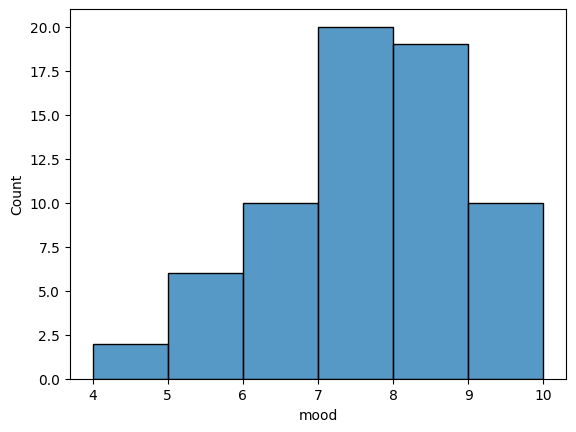

In [45]:
import seaborn as sns
sns.histplot(df['mood'], binwidth=1)

Можно проверить, является ли данное распределение нормальным

Посчитаем процент наблюдений, попадающих в интервал µ±σ

In [46]:
df[(df['mood']>np.mean(df['mood'])-1*np.std(df['mood'])) & (df['mood']<np.mean(df['mood'])+1*np.std(df['mood']))].shape[0]/df.shape[0]

0.7313432835820896

Попадающих в интервал µ±2σ

In [47]:
df[(df['mood']>np.mean(df['mood'])-2*np.std(df['mood'])) & (df['mood']<np.mean(df['mood'])+2*np.std(df['mood']))].shape[0]/df.shape[0]

0.9552238805970149

Попадающих в интервал µ±3σ

In [48]:
df[(df['mood']>np.mean(df['mood'])-3*np.std(df['mood'])) & (df['mood']<np.mean(df['mood'])+3*np.std(df['mood']))].shape[0]/df.shape[0]

1.0

Это подтверждает, что распределение нормальное и выбросов нет, т.к абсолютно все наблюдения попадают в интервал µ±3σ

## Визуализация

Импортируем нужные библиотеки

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Построим график изменения настроения во времени (в числовом и категориальном формате)

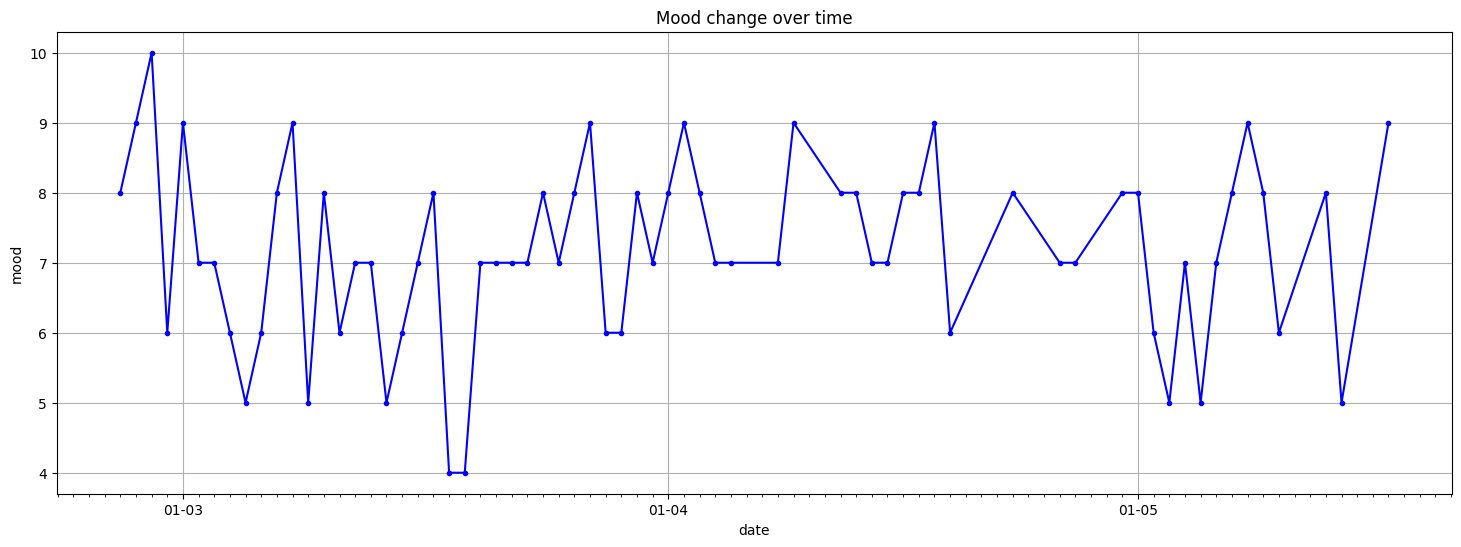

In [50]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%d-%m')

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
ax.plot(df['datetime'], df['mood'], 'bo-', markersize=3)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.title('Mood change over time')
plt.xlabel('date')
plt.ylabel('mood')
plt.grid(True)
plt.show()

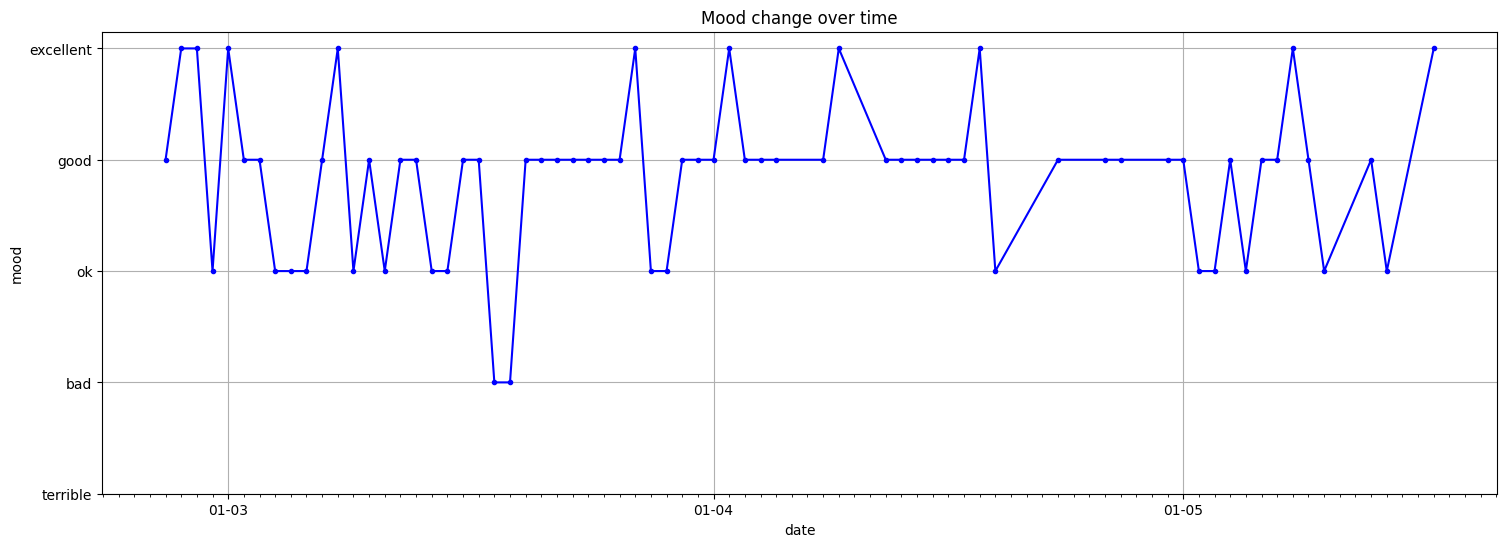

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
ax.plot(df['datetime'], df['mood_num'], 'bo-', markersize=3)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
ax.set_yticks(range(1, len(mood_cols)+1))
ax.set_yticklabels(mood_cols)
plt.title('Mood change over time')
plt.xlabel('date')
plt.ylabel('mood')
plt.grid(True)
plt.show()

Посмотрим на корреляцию признаков

<Axes: >

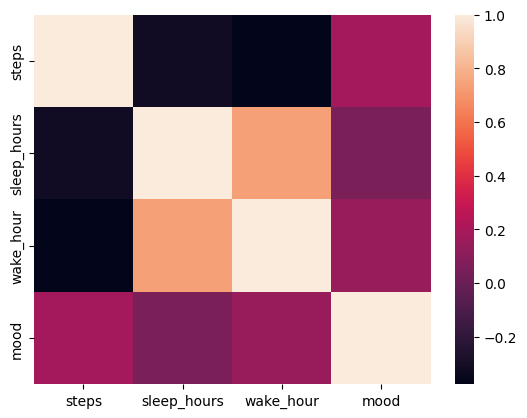

In [52]:
from pandas.core.tools import numeric
import seaborn as sns
sns.heatmap(df[numerical_features].join(df['mood']).corr(numeric_only=False))

<Axes: >

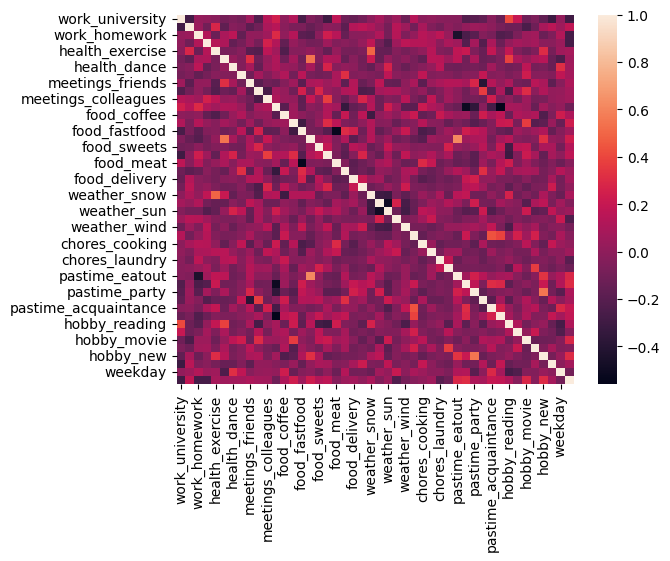

In [53]:
sns.heatmap(df[categorical_features].join(df['mood']).corr(numeric_only=False))

Рассмотрим признаки, которые неплохо коррелируют с откликом

Построим график зависимости настроения от дня недели

In [54]:
mood_by_weekday = df.groupby('weekday')['mood_num'].mean()
weekdays = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

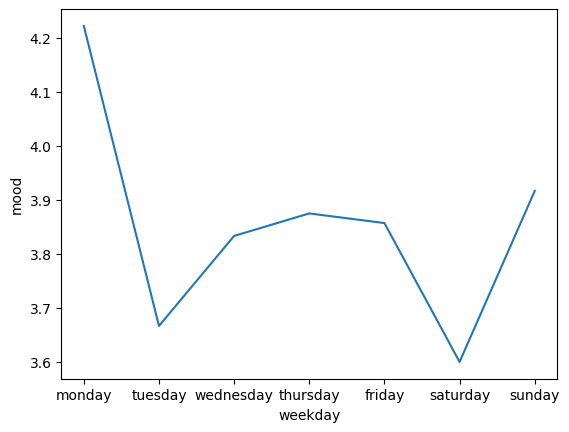

In [55]:
plt.plot(mood_by_weekday)
plt.xticks(ticks=range(0, 7), labels=weekdays)
plt.xlabel('weekday')
plt.ylabel('mood')
plt.show()

По графику явно видно, что менее счастливой в этот промежут времени я себя чувсвовала по вторникам и субботам, а самым счастливым днем был понедельник

Построим график зависимости настроения от количества сна

In [56]:
mood_by_sleep = df.groupby('sleep_hours')['mood_num'].mean()

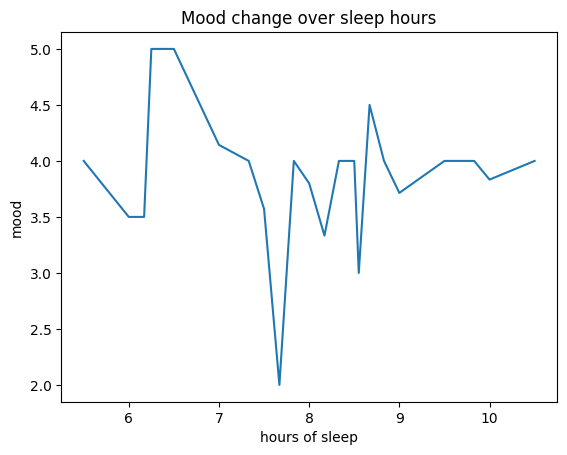

In [57]:
plt.plot(mood_by_sleep)
plt.title('Mood change over sleep hours')
plt.xlabel('hours of sleep')
plt.ylabel('mood')
plt.show()

График влияния времени пробуждения на настроение

In [58]:
mood_by_wake_up_time = df.groupby('wake_hour')['mood'].mean()

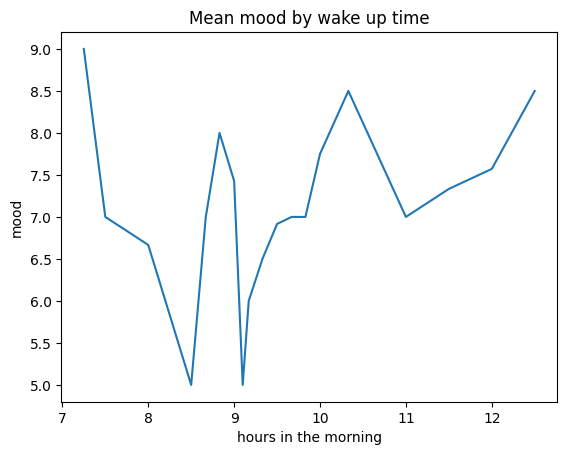

In [59]:
plt.plot(mood_by_wake_up_time)
plt.title('Mean mood by wake up time')
plt.xlabel('hours in the morning')
plt.ylabel('mood')
plt.show()

Заметно некоторое ухудщение настроения в дни, когда я просыпалась в 8-9 часов утра. На это могли повлиять другие признаки, от которых зависит сон.

Построим график среднего количества шагов в день в зависимости от настроения

In [60]:
mean_steps_by_mood = df.groupby('mood_shrink')['steps'].mean().sort_values()

Text(0, 0.5, 'steps per day')

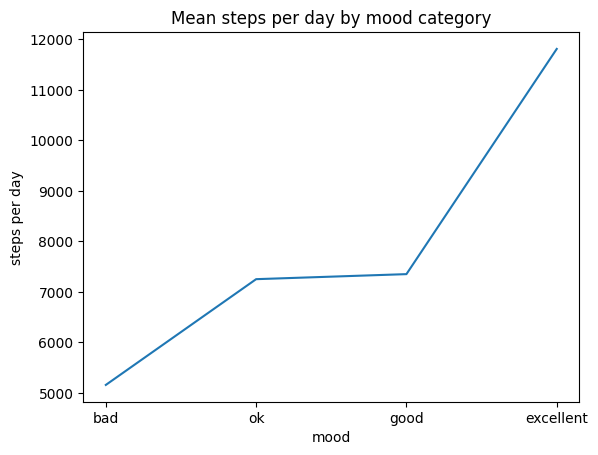

In [61]:
plt.plot(mean_steps_by_mood)
plt.title('Mean steps per day by mood category')
plt.xlabel('mood')
plt.ylabel('steps per day')

График явно показывает, что чем лучше по итогам дня настроение, тем больше среднее количество пройденных за этот день. Можно сделать вывод о том, что высокая физическая активность положительно влияет на настроение, и наоборот.

Рассмотрим признаки в порядке от наибольшей корреляции к наименьшей

In [62]:
df[features].join(df['mood']).corr(numeric_only=False)['mood'].sort_values(ascending=False)[1:15]

pastime_celebration     0.309543
hobby_new               0.302430
pastime_eatout          0.285688
hobby_movie             0.283286
food_vegetables         0.237263
food_restaurant         0.228032
pastime_acquaintance    0.197500
steps                   0.186702
pastime_travel          0.177745
work_tutoring           0.174706
food_fruits             0.165923
wake_hour               0.146435
food_sweets             0.134169
hobby_reading           0.116774
Name: mood, dtype: float64

Признаки, которые отрицательно коррелируют с настроением

In [63]:
df[features].join(df['mood']).corr(numeric_only=False)['mood'].sort_values(ascending=True).head(15)

work_university         -0.295397
work_homework           -0.272783
work_project            -0.269805
weather_partly_cloudy   -0.225946
chores_laundry          -0.195836
chores_cleaning         -0.123288
food_home               -0.117303
weekday                 -0.100613
weather_wind            -0.087700
weather_clouds          -0.043470
hobby_piano             -0.034621
hobby_languages         -0.034621
food_meat               -0.031562
weather_rain            -0.029747
chores_cooking           0.001456
Name: mood, dtype: float64

Можно увидеть, на сколько единиц конкретный признак увеличивает отклик

In [64]:
correlated_features = df[categorical_features].join(df['mood']).corr(numeric_only=False)['mood'].sort_values(ascending=False)[1:]

In [70]:
for col in list(correlated_features.index):
    print(col)
    print(df.groupby(col)['mood'].mean()[1]-df.groupby(col)['mood'].mean()[0], '\n')

pastime_celebration
1.5354838709677416 

hobby_new
1.90625 

pastime_eatout
0.8138297872340425 

hobby_movie
0.8858974358974354 

food_vegetables
0.6305555555555555 

food_restaurant
0.6407867494824009 

pastime_acquaintance
0.9016393442622954 

pastime_travel
1.3615384615384611 

work_tutoring
0.5939393939393947 

food_fruits
0.45553359683794525 

food_sweets
0.35299455535390223 

hobby_reading
0.33771929824561475 

pastime_party
0.6071428571428568 

food_coffee
0.28303571428571406 

meetings_friends
0.27927927927927865 

weather_snow
0.32954545454545414 

pastime_walk
0.24361702127659512 

health_exercise
0.510416666666667 

hobby_study
0.30651340996168575 

health_bicycle
0.833333333333333 

meetings_partner
0.23529411764705888 

food_delivery
0.25964912280701746 

meetings_colleagues
0.27857142857142847 

health_dance
0.27857142857142847 

chores_shopping
0.22245762711864447 

health_yoga
0.22245762711864447 

food_fastfood
0.13425925925925952 

food_soda
0.17816091954022983 

weat

# Выводы

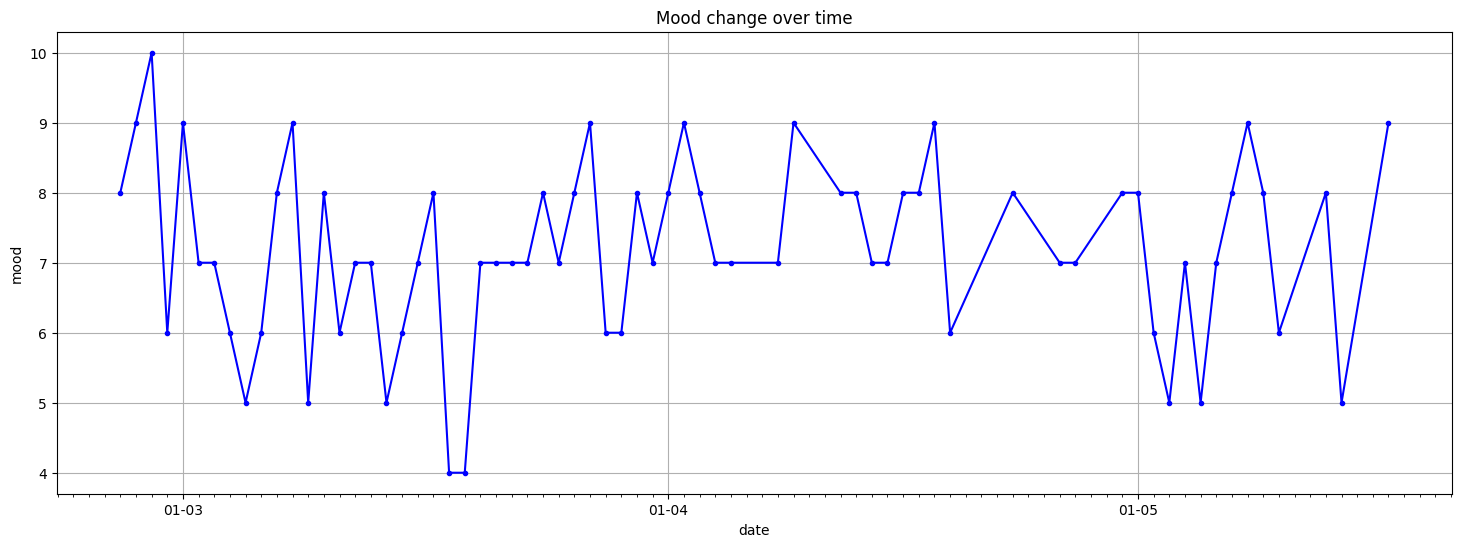

Средний уровень настроения за весь период наблюдения - 7 единиц, что входит в интервал "хорошего" настроения.
Обработав и проанализировав данных датасет, я могу сделать много выводов о том, какие занятия делают меня счастливее, а какие, напротив, ухуджают настроение.

Особый интерес для меня представляла оценка того, что определенные вещи приносят в мою жизнь. Например, как показала статистика, занятия в университете и выполнение домашней работы довольно негативно влияют на мое настроение (ухуджают его в среднем на 7-8%). Причиной этому может быть неверно выбранное направление учебы. Этому служит подкреплением тот факт, что самостоятельное обучение, напротив, поднимает настроение в среднем на 3%.

Помимо этого, анализ набора данных лишний раз подтвердил очевидные корреляции вроде того, что встречи с людьми и прогулки, походы в кафе и рестораны, а также занятие каким-то новым хобби хорошо влияют на настроение в течение дня.
Менее очевидной оказалась корреляция с занятиями спортом, они улучшают настроение в среднем на 5%, из чего можно сделать вывод, что стоит больше времени уделять этому занятию.

Неожиданным открытием также стало то, что работа репетитором в среднем хорошо влияет на настроение, а именно улучшает его на 6%

И так, имеет смысл больше времени уделять занятиям, которые приносят больше счастья, что иногда вовсе не очевидно и сложно заметить "невооруженным глазом"